# Analisi dati tesi med

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# Funzione per fare regplots con hues e plt.subplots together
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots

In [2]:
normoacusici = pd.read_excel('normoacusici.xlsx')
ipoacusici = pd.read_excel('ipoacusici.xlsx')

In [3]:
normoacusici.keys()

Index(['SOGG', 'GENERE', 'ETA', 'PTA media', 'SRTq', 'SRTn'], dtype='object')

In [4]:
ipoacusici.keys()


Index(['SOGG', 'GENERE', 'ETA', 'PTA patologico', 'PTA sano', 'SRTq', 'SRTn'], dtype='object')

# Pazienti normoacusici

In [5]:
# fix entries for PTA media misread from excel
normoacusici['PTA media'] = normoacusici['PTA media'].replace(11875,11.875)
normoacusici['PTA media'] = normoacusici['PTA media'].replace(10625,10.625)

In [6]:
# TODO: fix
normoacusici

,SOGG,GENERE,ETA,PTA media,SRTq,SRTn
0,1,M,6,11.250,26.7,-4.0
1,2,M,6,10.000,35.0,-4.8
2,3,F,7,11.250,28.0,-6.0
3,4,F,6,15.000,28.3,-4.3
4,5,F,6,11.000,30.5,-4.2
5,6,M,7,11.250,28.7,-6.4
6,7,F,7,10.000,24.1,-6.5
7,8,M,8,10.000,22.5,-5.9
8,9,F,8,10.000,26.0,-3.7
9,10,F,8,11.250,30.1,-7.5


## Genere

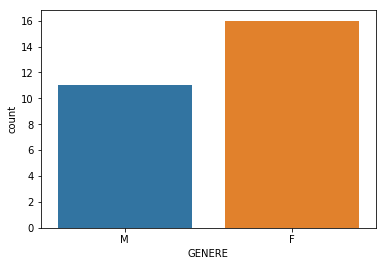

In [7]:
sns.countplot(normoacusici['GENERE'])
plt.savefig('figure/hist_genere_normoacusici.png')

## Eta'

In [8]:
# media & SD Eta'
np.mean(normoacusici['ETA']), np.std(normoacusici['ETA'])

(8.962962962962964, 2.045437225405048)

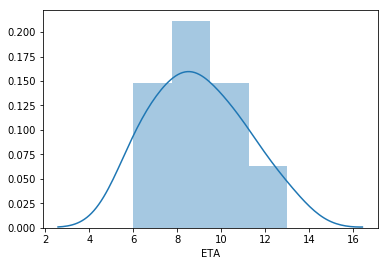

In [9]:
sns.distplot(normoacusici['ETA'])
plt.savefig('figure/hist_eta_normoacusici.png')

## PTA media

In [10]:
# media  & SD PTA media
np.mean(normoacusici['PTA media']), np.std(normoacusici['PTA media'])

(11.217592592592593, 1.6800134315878252)

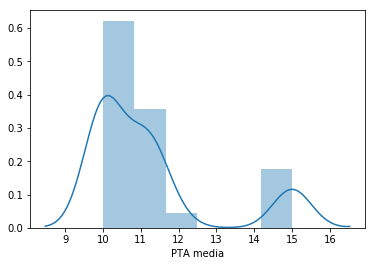

In [11]:
sns.distplot(normoacusici['PTA media'])
plt.savefig('figure/hist_PTAmedia_normoacusici.png')

## SRTq

In [12]:
# media & SD SRTq
np.mean(normoacusici['SRTq']), np.std(normoacusici['SRTq'])

(26.97407407407407, 3.992640692350958)

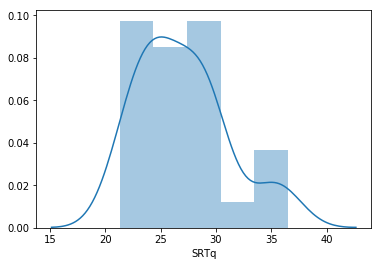

In [13]:
sns.distplot(normoacusici['SRTq'])
plt.savefig('figure/hist_SRTq_normoacusici.png')

## SRTn

In [14]:
# media & SD SRTn
np.mean(normoacusici['SRTn']), np.std(normoacusici['SRTn'])

(-5.707407407407407, 1.5589469204196373)

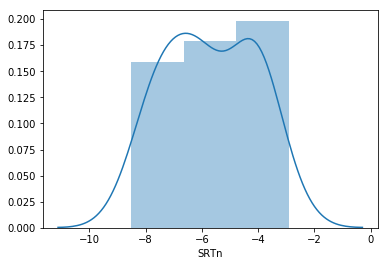

In [15]:
sns.distplot(normoacusici['SRTn'])
plt.savefig('figure/hist_SRTn_normoacusici.png')

## Tabella correlazione tra variabili

In [16]:
normoacusici.corr()

,SOGG,ETA,PTA media,SRTq,SRTn
SOGG,1.000000,0.976392,-0.131614,-0.215923,-0.292210
ETA,0.976392,1.000000,-0.207825,-0.201477,-0.357828
PTA media,-0.131614,-0.207825,1.000000,0.306322,0.370236
SRTq,-0.215923,-0.201477,0.306322,1.000000,0.407689
SRTn,-0.292210,-0.357828,0.370236,0.407689,1.000000


## Correlazione PTA-SRTq

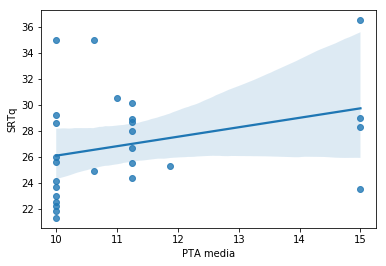

In [25]:
sns.regplot(x='PTA media', y='SRTq', data=normoacusici)
plt.savefig('figure/PTA_vs_SRTq_normoacusici.png')

## Correlazione PTA-SRTn

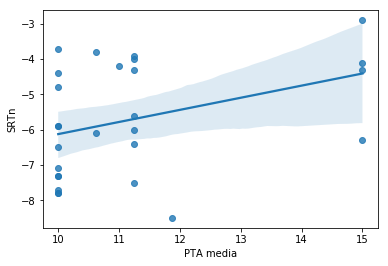

In [26]:
sns.regplot(x='PTA media', y='SRTn', data=normoacusici)
plt.savefig('figure/PTA_vs_SRTn_normoacusici.png')

## Correlazione tra PTA e SRT (insieme)

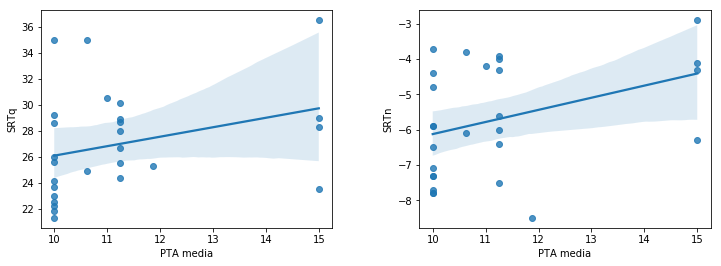

In [27]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
sns.regplot(x='PTA media', y='SRTq', data=normoacusici, ax = axes[0])
sns.regplot(x='PTA media', y='SRTn', data=normoacusici, ax = axes[1])
fig.savefig('figure/PTA_vs_SRT_insieme_normoacusici.png')

## Correlazione tra ETA' e SRTq

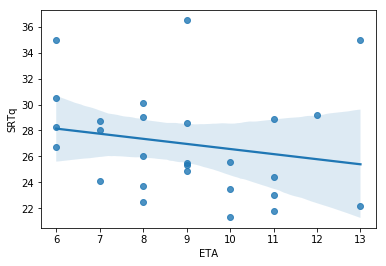

In [28]:
sns.regplot(x='ETA', y='SRTq', data=normoacusici)
plt.savefig('figure/ETA_vs_SRTq_normoacusici.png')

## Correlazione tra ETA' e SRTn

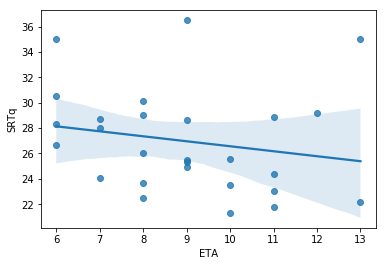

In [29]:
sns.regplot(x='ETA', y='SRTq', data=normoacusici)
plt.savefig('figure/ETA_vs_SRTq_normoacusici.png')

## Correlazione tra ETA' e SRT (insieme)

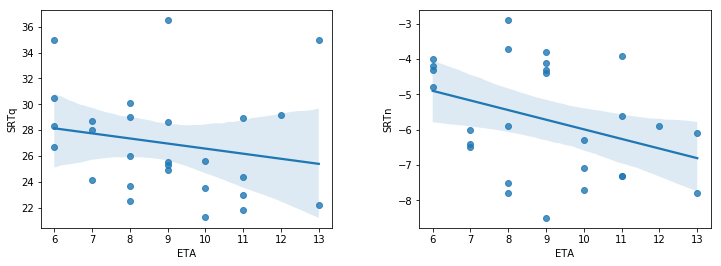

In [30]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
sns.regplot(x='ETA', y='SRTq', data=normoacusici, ax = axes[0])
sns.regplot(x='ETA', y='SRTn', data=normoacusici, ax = axes[1])
fig.savefig('figure/ETA_vs_SRT_insieme_normoacusici.png')

## ETA vs SRTq e SRTn in funzione del genere

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
hue_regplot(x='ETA', y='SRTq', data=normoacusici, ax = axes[0], hue='GENERE')
hue_regplot(x='ETA', y='SRTn', data=normoacusici, ax = axes[1], hue='GENERE')
plt.legend(['M', 'F'])
fig.savefig('figure/ETA_vs_SRT_genere_normoacusici.png')

## Correlazione tra SRTq e SRTn

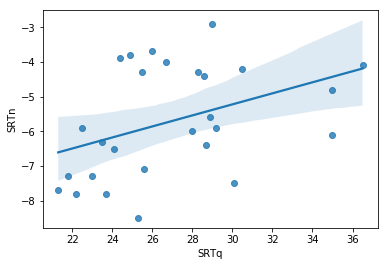

In [31]:
sns.regplot(x='SRTq', y='SRTn', data=normoacusici)
plt.savefig('figure/SRTn_vs_SRTq_normoacusici.png')

## Correlazione tra SRTq e SRTn in funzione dell'eta'

In [77]:
# TODO

# Pazienti ipoacusici

In [32]:
ipoacusici

,SOGG,GENERE,ETA,PTA patologico,PTA sano,SRTq,SRTn
0,28,M,6,60.00,15.00,33.6,0.2
1,29,M,6,51.25,12.50,32.1,-2.2
2,30,M,6,45.00,15.00,31.6,-3.2
3,31,M,6,105.00,16.35,30.5,1.2
4,32,F,6,77.50,20.00,30.1,-2.2
5,33,M,6,80.00,15.00,33.2,0.1
6,34,M,6,120.00,20.00,33.5,1.5
7,35,M,6,66.25,16.25,32.7,0.3
8,36,F,6,112.50,20.00,30.9,1.1
9,37,M,7,68.75,15.00,27.9,-2.0


In [33]:
ipoacusici.keys()

Index(['SOGG', 'GENERE', 'ETA', 'PTA patologico', 'PTA sano', 'SRTq', 'SRTn'], dtype='object')

## GENERE

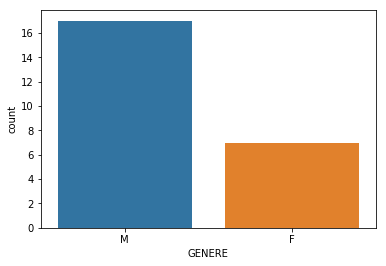

In [34]:
sns.countplot(ipoacusici['GENERE'])
plt.savefig('figure/hist_genere_ipoacusici.png')

## ETA'

In [35]:
# media & SD Eta'
np.mean(ipoacusici['ETA']), np.std(ipoacusici['ETA'])

(8.375, 2.194927865177654)

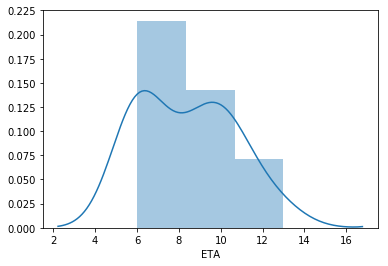

In [36]:
sns.distplot(ipoacusici['ETA'])
plt.savefig('figure/hist_eta_ipoacusici.png')

## PTA patologico

In [37]:
# media & SD PTA patologico
np.mean(ipoacusici['PTA patologico']), np.std(ipoacusici['PTA patologico'])

(81.71875, 28.126880724154844)

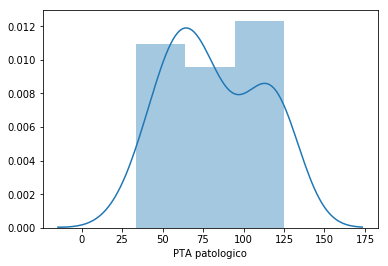

In [38]:
sns.distplot(ipoacusici['PTA patologico'])
plt.savefig('figure/hist_PTApat_ipoacusici.png')

## PTA sano

In [39]:
# media & SD PTA sano
np.mean(ipoacusici['PTA sano']), np.std(ipoacusici['PTA sano'])

(14.327083333333334, 3.8881759639179)

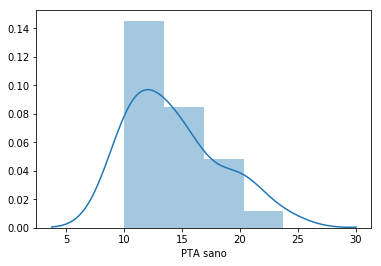

In [40]:
sns.distplot(ipoacusici['PTA sano'])
plt.savefig('figure/hist_PTAsano_ipoacusici.png')

## SRTq

In [41]:
# media & SD SRTq
np.mean(ipoacusici['SRTq']), np.std(ipoacusici['SRTq'])

(30.916666666666668, 3.15352536413174)

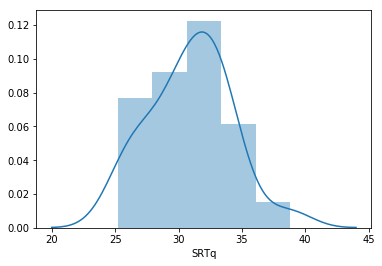

In [42]:
sns.distplot(ipoacusici['SRTq'])
plt.savefig('figure/hist_SRTq_ipoacusici.png')

## SRTn

In [43]:
# media & SD SRTn
np.mean(ipoacusici['SRTn']), np.std(ipoacusici['SRTn'])

(-2.1250000000000004, 2.50453754879685)

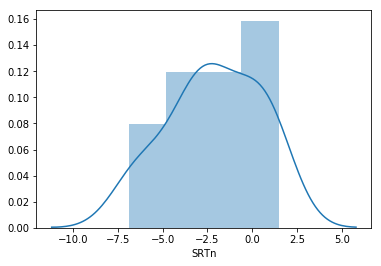

In [44]:
sns.distplot(ipoacusici['SRTn'])
plt.savefig('figure/hist_SRTn_ipoacusici.png')

## Tabella correlazione tra variabili

In [45]:
ipoacusici.corr()

,SOGG,ETA,PTA patologico,PTA sano,SRTq,SRTn
SOGG,1.000000,0.961199,0.155555,-0.319644,-0.063561,-0.346323
ETA,0.961199,1.000000,0.040178,-0.398608,-0.017758,-0.371206
PTA patologico,0.155555,0.040178,1.000000,0.080584,-0.502901,-0.239531
PTA sano,-0.319644,-0.398608,0.080584,1.000000,0.575496,0.547897
SRTq,-0.063561,-0.017758,-0.502901,0.575496,1.000000,0.693361
SRTn,-0.346323,-0.371206,-0.239531,0.547897,0.693361,1.000000


## Correlazione PTA patologico - SRTq

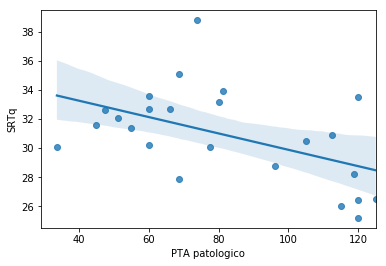

In [46]:
sns.regplot(x='PTA patologico', y='SRTq', data=ipoacusici)
fig.savefig('figure/PTApat_vs_SRTq_ipoacusici.png')

## Correlazione PTA sano - SRTq

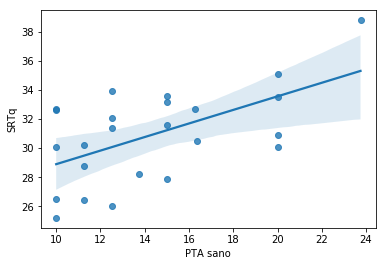

In [47]:
sns.regplot(x='PTA sano', y='SRTq', data=ipoacusici)
fig.savefig('figure/PTAsano_vs_SRTq_ipoacusici.png')

## Correlazione PTA patologico - SRTn

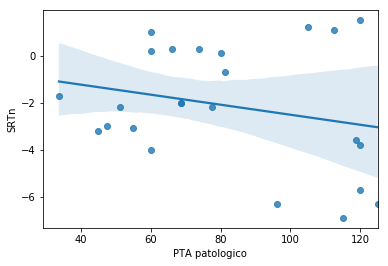

In [48]:
sns.regplot(x='PTA patologico', y='SRTn', data=ipoacusici)
fig.savefig('figure/PTApat_vs_SRTn_ipoacusici.png')

## Correlazione PTA sano - SRTn

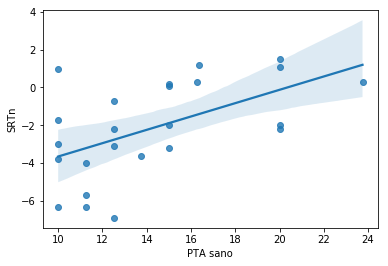

In [49]:
sns.regplot(x='PTA sano', y='SRTn', data=ipoacusici)
fig.savefig('figure/PTAsano_vs_SRTn_ipoacusici.png')

## Correlazione PTA patologico e sano - SRTq

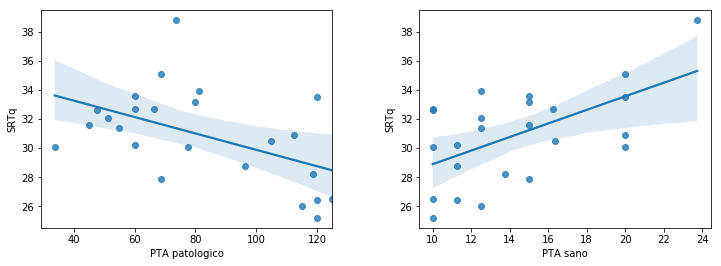

In [50]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
sns.regplot(x='PTA patologico', y='SRTq', data=ipoacusici, ax = axes[0])
sns.regplot(x='PTA sano', y='SRTq', data=ipoacusici, ax = axes[1])
fig.savefig('figure/PTApatsano_vs_SRTq_insieme_ipoacusici.png')

## Correlazione PTA patologico e sano - SRTn

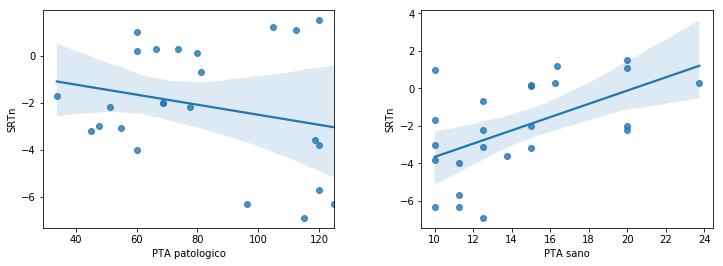

In [51]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
sns.regplot(x='PTA patologico', y='SRTn', data=ipoacusici, ax = axes[0])
sns.regplot(x='PTA sano', y='SRTn', data=ipoacusici, ax = axes[1])
fig.savefig('figure/PTApatsano_vs_SRTn_insieme_ipoacusici.png')

## Correlazione PTA patologico - SRTq e SRTn

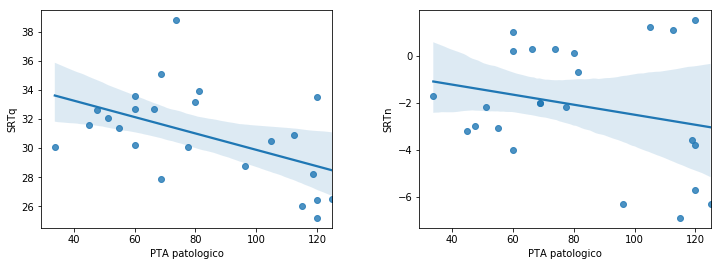

In [52]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
sns.regplot(x='PTA patologico', y='SRTq', data=ipoacusici, ax = axes[0])
sns.regplot(x='PTA patologico', y='SRTn', data=ipoacusici, ax = axes[1])
fig.savefig('figure/PTApat_vs_SRTqn_insieme_ipoacusici.png')

## Correlazione PTA sano - SRTq e SRTn

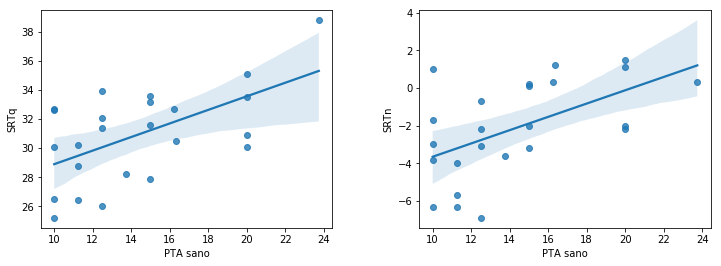

In [53]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
sns.regplot(x='PTA sano', y='SRTq', data=ipoacusici, ax = axes[0])
sns.regplot(x='PTA sano', y='SRTn', data=ipoacusici, ax = axes[1])
fig.savefig('figure/PTAsano_vs_SRTqn_insieme_ipoacusici.png')

## Correlazione ETA'- SRTq

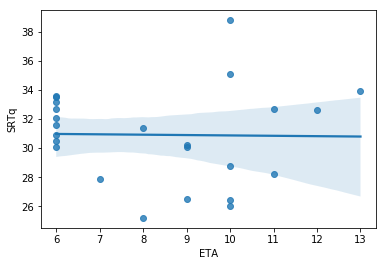

In [54]:
sns.regplot(x='ETA', y='SRTq', data=ipoacusici)
fig.savefig('figure/ETA_vs_SRTq_ipoacusici.png')

## Correlazione ETA'- SRTn

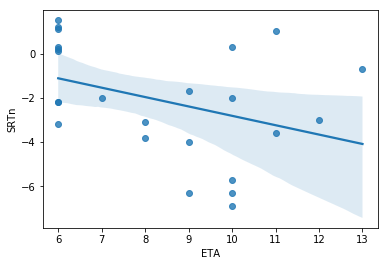

In [55]:
sns.regplot(x='ETA', y='SRTn', data=ipoacusici)
fig.savefig('figure/ETA_vs_SRTn_ipoacusici.png')

## Correlazione ETA' - SRT (insieme)

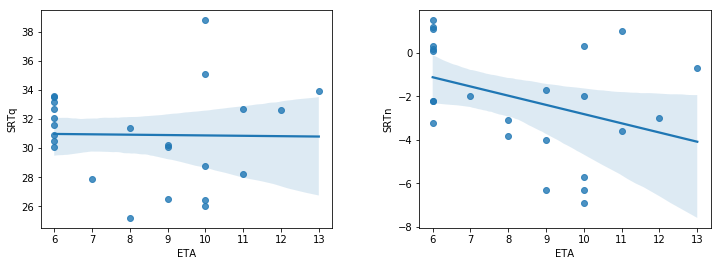

In [56]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
sns.regplot(x='ETA', y='SRTq', data=ipoacusici, ax = axes[0])
sns.regplot(x='ETA', y='SRTn', data=ipoacusici, ax = axes[1])
fig.savefig('figure/ETA_vs_SRT_insieme_ipoacusici.png')

## ETA vs SRTq e SRTn in funzione del genere

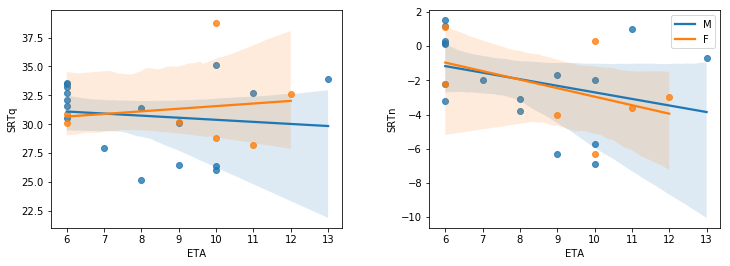

In [75]:
fig, axes = plt.subplots(1,2, figsize = (12,4))
fig.subplots_adjust(wspace=0.3)
hue_regplot(x='ETA', y='SRTq', data=ipoacusici, ax = axes[0], hue='GENERE')
hue_regplot(x='ETA', y='SRTn', data=ipoacusici, ax = axes[1], hue='GENERE')
plt.legend(['M', 'F'])
fig.savefig('figure/ETA_vs_SRT_genere_ipoacusici.png')

## Correlazione tra SRTq e SRTn

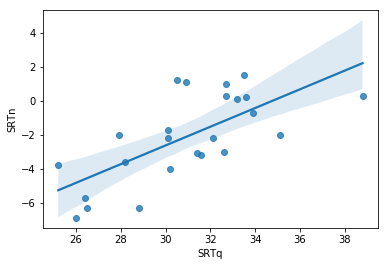

In [57]:
sns.regplot(x='SRTq', y='SRTn', data=ipoacusici)
fig.savefig('figure/SRTn_vs_SRTq_ipoacusici.png')

## Correlazione tra SRTq e SRTn in funzione dell'eta'

In [76]:
# TODO